**NB:** Precomputed predictions can be found in the Excel file `./data/precomputed_predictions.xlsx`

In [1]:
import os, pickle, glob, csv
import prody
import numpy as np
import pandas as pd

In [2]:
import rhapsody as rd

rd.initialSetup()

@> You are running Rhapsody v0.9.7

@> Pre-existing working directory detected: /home/luca/rhapsody
@> Pre-existing classifiers found: /home/luca/rhapsody/default_classifiers-sklearn_v0.21.3
@> Pre-existing EVmutation metrics found.
@> EVmutation folder found: /home/luca/rhapsody/EVmutation_mutation_effects
@> DSSP is installed on the system.
@> Setup complete.


# Analysis of human ROMK variants
Since the structure of human ROMK has not been resolved yet, we will use a homology model from SWISS-MODEL.

In [3]:
from prody import *

pdb_path = 'data/ROMK_homology_model.pdb'
pdb = prody.parsePDB(pdb_path).select('protein')

print(pdb['A'].getResnums())
pdb.getHierView()

@> 10528 atoms and 1 coordinate set(s) were parsed in 0.16s.


[ 38  38  38 ... 365 365 365]


<HierView: Selection 'protein' (4 chains, 1312 residues)>

## RHAPSODY predictions
We will compute predictions with different environment models and with/without EVmutation feature included in the classifier. We will refer to the Rhapsody classifier without EVmutation feature as "classic".

In [4]:
all_preds = {}

if os.path.isfile('local/all_preds.pkl'):
    all_preds = pickle.load(open('local/all_preds.pkl', 'rb'))
    print('Precomputed predictions imported.')
else:
    if not os.path.isdir('local'):
        os.mkdir('local')
    for mode in ['classic', 'EVmutation']:
        for env in ['chain', 'reduced', 'sliced']:
            case = f'{mode}-{env}'
            folder = os.path.join('local', case)
            if os.path.isdir(folder):
                pickle_file = os.path.join(folder, 'rhapsody-pickle.pkl')
                all_preds[case] = pickle.load(open(pickle_file, 'rb'))
                continue
            os.mkdir(folder)
            # run rhapsody
            if mode == 'classic':
                rh = rd.rhapsody('data/pph2-full.txt', query_type='PolyPhen2', 
                                 custom_PDB=pdb, force_env=env)
            else:
                rh = rd.rhapsody('data/pph2-full.txt', query_type='PolyPhen2', 
                                 main_classifier=rd.getDefaultClassifiers()['EVmut'],
                                 custom_PDB=pdb, force_env=env)
            # store files
            all_preds[case] = rh
            for f in glob.glob('rhapsody-*.*'):
                os.rename(f, os.path.join(folder, f))
    pickle.dump(all_preds, open('local/all_preds.pkl', 'wb'))

@> Logging into file: rhapsody-log.txt
@> Logging started at 2020-01-24 14:15:57.077327
@> Imported feature set:
@>    'wt_PSIC'* 
@>    'Delta_PSIC'* 
@>    'SASA'* 
@>    'ANM_MSF-chain'* 
@>    'ANM_effectiveness-chain'* 
@>    'ANM_sensitivity-chain'* 
@>    'stiffness-chain'* 
@>    'entropy' 
@>    'ranked_MI' 
@>    'BLOSUM'* 
@>    (* auxiliary feature set)
@> PolyPhen-2's output parsed.
@> Sequence-conservation features have been retrieved from PolyPhen-2's output.
@> Mapping SAVs to PDB structures...
Mapping SAV 'P48048 1 M A' to PDB:   0%|          | 0/7429 [00:00<?]@> Pickle 'UniprotMap-P48048.pkl' recovered.
@> Aligning Uniprot sequence to custom PDB...
@> Chain C was quick-aligned in 0.0s.
@> Chain B was quick-aligned in 0.0s.
@> Chain A was quick-aligned in 0.0s.
@> Chain D was quick-aligned in 0.0s.
Mapping SAV 'P48048 391 M Y' to PDB: 100%|██████████| 7429/7429 [00:08<00:00] 
@> Pickle 'UniprotMap-P48048.pkl' saved.
@> 6232 out of 7429 SAVs have been mapped to PDB in 8

Mapping SAV 'P48048 380 L Y' to Pfam:  32%|███▏      | 2370/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 380.


Mapping SAV 'P48048 390 K H' to Pfam:  32%|███▏      | 2370/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 390.


Mapping SAV 'P48048 390 K M' to Pfam:  33%|███▎      | 2469/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 390.


Mapping SAV 'P48048 387 D R' to Pfam:  33%|███▎      | 2469/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 387.


Mapping SAV 'P48048 372 G P' to Pfam:  34%|███▍      | 2558/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 372.


Mapping SAV 'P48048 369 M S' to Pfam:  36%|███▌      | 2641/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 369.


Mapping SAV 'P48048 379 I E' to Pfam:  36%|███▌      | 2641/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 379.


Mapping SAV 'P48048 376 P H' to Pfam:  37%|███▋      | 2721/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 376.


Mapping SAV 'P48048 18 E Y' to Pfam:  62%|██████▏   | 4591/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 18.


Mapping SAV 'P48048 16 L C' to Pfam:  63%|██████▎   | 4698/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 16.


Mapping SAV 'P48048 22 K I' to Pfam:  63%|██████▎   | 4698/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 22.


Mapping SAV 'P48048 19 S K' to Pfam:  65%|██████▍   | 4798/7429 [00:04<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 19.


Mapping SAV 'P48048 4 S H' to Pfam:  66%|██████▌   | 4886/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 4.


Mapping SAV 'P48048 1 M K' to Pfam:  66%|██████▌   | 4886/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 1.


Mapping SAV 'P48048 10 D S' to Pfam:  67%|██████▋   | 4963/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 10.


Mapping SAV 'P48048 7 N V' to Pfam:  68%|██████▊   | 5037/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 7.


Mapping SAV 'P48048 41 R P' to Pfam:  69%|██████▊   | 5106/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 41.


Mapping SAV 'P48048 38 Q C' to Pfam:  70%|██████▉   | 5183/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 38.


Mapping SAV 'P48048 29 V C' to Pfam:  72%|███████▏  | 5345/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 29.


Mapping SAV 'P48048 26 K E' to Pfam:  72%|███████▏  | 5345/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 26.


Mapping SAV 'P48048 35 H N' to Pfam:  73%|███████▎  | 5421/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 35.


Mapping SAV 'P48048 32 F P' to Pfam:  74%|███████▍  | 5492/7429 [00:06<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 32.


Mapping SAV 'P48048 188 R K' to Pfam:  80%|████████  | 5953/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 188.


Mapping SAV 'P48048 187 K E' to Pfam:  81%|████████▏ | 6054/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 187.


Mapping SAV 'P48048 191 T W' to Pfam:  84%|████████▍ | 6238/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 191.


Mapping SAV 'P48048 391 M Y' to Pfam: 100%|█████████▉| 7405/7429 [00:07<00:00]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 391.
@> Pickle 'UniprotMap-P48048.pkl' saved.
Mapping SAV 'P48048 391 M Y' to Pfam: 100%|██████████| 7429/7429 [00:07<00:00]
@> SAVs have been mapped on Pfam domains and sequence properties have been computed in 8.0s.
@> Random Forest classifier imported in 35.3s.
@> 6023 predictions computed in 3.1s.
@> Random Forest classifier imported in 9.3s.
@> 6232 predictions computed in 3.1s.
@> Recovering EVmutation data...
@> EVmutation scores recovered in 14.3s.
@> Logging stopped at 2020-01-24 14:18:17.840423
@> Closing logfile: rhapsody-log.txt
@> Logging into file: rhapsody-log.txt
@> Logging started at 2020-01-24 14:18:17.845084
@> Imported feature set:
@>    'wt_PSIC'* 
@>    'Delta_PSIC'* 
@>    'SASA'* 
@>    'ANM_MSF-reduced'* (originally '-chain')
@>    'ANM_effectiveness-reduced'* (originally '-chain')
@>    'ANM_sensitivity-reduced'* (o

Mapping SAV 'P48048 382 E S' to Pfam:  31%|███       | 2292/7429 [00:02<00:04]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 382.


Mapping SAV 'P48048 381 S K' to Pfam:  32%|███▏      | 2402/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 381.


Mapping SAV 'P48048 390 K T' to Pfam:  32%|███▏      | 2402/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 390.


Mapping SAV 'P48048 387 D Y' to Pfam:  34%|███▎      | 2501/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 387.


Mapping SAV 'P48048 372 G V' to Pfam:  35%|███▍      | 2588/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 372.


Mapping SAV 'P48048 370 K A' to Pfam:  35%|███▍      | 2588/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 370.


Mapping SAV 'P48048 379 I L' to Pfam:  36%|███▌      | 2668/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 379.


Mapping SAV 'P48048 376 P N' to Pfam:  37%|███▋      | 2744/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 376.


Mapping SAV 'P48048 17 T Q' to Pfam:  61%|██████▏   | 4567/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 17.


Mapping SAV 'P48048 13 I G' to Pfam:  63%|██████▎   | 4681/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 13.


Mapping SAV 'P48048 22 K P' to Pfam:  63%|██████▎   | 4681/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 22.


Mapping SAV 'P48048 19 S Q' to Pfam:  64%|██████▍   | 4787/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 19.


Mapping SAV 'P48048 4 S N' to Pfam:  66%|██████▌   | 4882/7429 [00:04<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 4.


Mapping SAV 'P48048 1 M R' to Pfam:  66%|██████▌   | 4882/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 1.


Mapping SAV 'P48048 11 T A' to Pfam:  67%|██████▋   | 4971/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 11.


Mapping SAV 'P48048 8 V D' to Pfam:  68%|██████▊   | 5054/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 8.


Mapping SAV 'P48048 41 R W' to Pfam:  68%|██████▊   | 5054/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 41.


Mapping SAV 'P48048 38 Q H' to Pfam:  69%|██████▉   | 5135/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 38.


Mapping SAV 'P48048 29 V H' to Pfam:  71%|███████   | 5291/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 29.


Mapping SAV 'P48048 26 K L' to Pfam:  72%|███████▏  | 5372/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 26.


Mapping SAV 'P48048 35 H T' to Pfam:  73%|███████▎  | 5449/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 35.


Mapping SAV 'P48048 32 F V' to Pfam:  73%|███████▎  | 5449/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 32.


Mapping SAV 'P48048 188 R Q' to Pfam:  80%|████████  | 5960/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 188.


Mapping SAV 'P48048 188 R V' to Pfam:  82%|████████▏ | 6061/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 188.


Mapping SAV 'P48048 190 K N' to Pfam:  83%|████████▎ | 6160/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 190.


Mapping SAV 'P48048 391 M Y' to Pfam: 100%|█████████▉| 7404/7429 [00:07<00:00]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 391.
@> Pickle 'UniprotMap-P48048.pkl' saved.
Mapping SAV 'P48048 391 M Y' to Pfam: 100%|██████████| 7429/7429 [00:07<00:00]
@> SAVs have been mapped on Pfam domains and sequence properties have been computed in 7.7s.
@> Random Forest classifier imported in 0.5s.
@> 6023 predictions computed in 3.8s.
@> Random Forest classifier imported in 0.4s.
@> 6232 predictions computed in 3.6s.
@> Recovering EVmutation data...
@> EVmutation scores recovered in 15.3s.
@> Logging stopped at 2020-01-24 14:19:12.725184
@> Closing logfile: rhapsody-log.txt
@> Logging into file: rhapsody-log.txt
@> Logging started at 2020-01-24 14:19:12.728228
@> Imported feature set:
@>    'wt_PSIC'* 
@>    'Delta_PSIC'* 
@>    'SASA'* 
@>    'ANM_MSF-sliced'* (originally '-chain')
@>    'ANM_effectiveness-sliced'* (originally '-chain')
@>    'ANM_sensitivity-sliced'* (origi

Mapping SAV 'P48048 384 N P' to Pfam:  32%|███▏      | 2367/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 384.


Mapping SAV 'P48048 381 S R' to Pfam:  32%|███▏      | 2367/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 381.


Mapping SAV 'P48048 391 M D' to Pfam:  33%|███▎      | 2471/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 391.


Mapping SAV 'P48048 388 D H' to Pfam:  33%|███▎      | 2471/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 388.


Mapping SAV 'P48048 373 Y E' to Pfam:  35%|███▍      | 2564/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 373.


Mapping SAV 'P48048 370 K H' to Pfam:  35%|███▍      | 2564/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 370.


Mapping SAV 'P48048 378 F G' to Pfam:  36%|███▌      | 2650/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 378.


Mapping SAV 'P48048 373 Y S' to Pfam:  37%|███▋      | 2728/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 373.


Mapping SAV 'P48048 16 L M' to Pfam:  62%|██████▏   | 4617/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 16.


Mapping SAV 'P48048 13 I P' to Pfam:  62%|██████▏   | 4617/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 13.


Mapping SAV 'P48048 22 K W' to Pfam:  64%|██████▎   | 4730/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 22.


Mapping SAV 'P48048 20 M A' to Pfam:  64%|██████▎   | 4730/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 20.


Mapping SAV 'P48048 4 S W' to Pfam:  65%|██████▌   | 4833/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 4.


Mapping SAV 'P48048 2 N A' to Pfam:  66%|██████▋   | 4925/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 2.


Mapping SAV 'P48048 11 T H' to Pfam:  66%|██████▋   | 4925/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 11.


Mapping SAV 'P48048 8 V K' to Pfam:  67%|██████▋   | 5006/7429 [00:05<00:03] @> WARNING Unable to compute Pfam features: No Pfam domain for resid 8.


Mapping SAV 'P48048 25 R H' to Pfam:  68%|██████▊   | 5083/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 25.


Mapping SAV 'P48048 38 Q P' to Pfam:  69%|██████▉   | 5161/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 38.


Mapping SAV 'P48048 29 V P' to Pfam:  71%|███████   | 5244/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 29.


Mapping SAV 'P48048 26 K S' to Pfam:  72%|███████▏  | 5344/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 26.


Mapping SAV 'P48048 31 R K' to Pfam:  73%|███████▎  | 5429/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 31.


Mapping SAV 'P48048 36 S G' to Pfam:  73%|███████▎  | 5429/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 36.


Mapping SAV 'P48048 33 F I' to Pfam:  74%|███████▍  | 5509/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 33.


Mapping SAV 'P48048 189 A G' to Pfam:  81%|████████▏ | 6041/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 189.


Mapping SAV 'P48048 190 K V' to Pfam:  83%|████████▎ | 6144/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 190.


Mapping SAV 'P48048 391 M Y' to Pfam: 100%|█████████▉| 7397/7429 [00:07<00:00]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 391.
@> Pickle 'UniprotMap-P48048.pkl' saved.
Mapping SAV 'P48048 391 M Y' to Pfam: 100%|██████████| 7429/7429 [00:07<00:00]
@> SAVs have been mapped on Pfam domains and sequence properties have been computed in 7.8s.
@> Random Forest classifier imported in 0.5s.
@> 6023 predictions computed in 3.7s.
@> Random Forest classifier imported in 0.5s.
@> 6232 predictions computed in 3.1s.
@> Recovering EVmutation data...
@> EVmutation scores recovered in 14.0s.
@> Logging stopped at 2020-01-24 14:20:21.299870
@> Closing logfile: rhapsody-log.txt
@> Logging into file: rhapsody-log.txt
@> Logging started at 2020-01-24 14:20:21.303158
@> Imported feature set:
@>    'wt_PSIC' 
@>    'Delta_PSIC' 
@>    'SASA' 
@>    'ANM_MSF-chain' 
@>    'ANM_effectiveness-chain' 
@>    'ANM_sensitivity-chain' 
@>    'stiffness-chain' 
@>    'entropy' 
@>    'ranked_

Mapping SAV 'P48048 384 N T' to Pfam:  31%|███       | 2271/7429 [00:02<00:04]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 384.


Mapping SAV 'P48048 381 S Y' to Pfam:  32%|███▏      | 2377/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 381.


Mapping SAV 'P48048 391 M H' to Pfam:  33%|███▎      | 2476/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 391.


Mapping SAV 'P48048 388 D M' to Pfam:  33%|███▎      | 2476/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 388.


Mapping SAV 'P48048 373 Y I' to Pfam:  35%|███▍      | 2566/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 373.


Mapping SAV 'P48048 369 M A' to Pfam:  35%|███▍      | 2566/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 369.


Mapping SAV 'P48048 376 P W' to Pfam:  36%|███▌      | 2646/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 376.


Mapping SAV 'P48048 374 D A' to Pfam:  37%|███▋      | 2721/7429 [00:02<00:07]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 374.


Mapping SAV 'P48048 16 L R' to Pfam:  62%|██████▏   | 4598/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 16.


Mapping SAV 'P48048 13 I T' to Pfam:  63%|██████▎   | 4710/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 13.


Mapping SAV 'P48048 23 H D' to Pfam:  63%|██████▎   | 4710/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 23.


Mapping SAV 'P48048 20 M F' to Pfam:  65%|██████▍   | 4811/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 20.


Mapping SAV 'P48048 5 S D' to Pfam:  65%|██████▍   | 4811/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 5.


Mapping SAV 'P48048 2 N F' to Pfam:  66%|██████▌   | 4904/7429 [00:04<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 2.


Mapping SAV 'P48048 7 N D' to Pfam:  67%|██████▋   | 4990/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 7.


Mapping SAV 'P48048 11 T P' to Pfam:  67%|██████▋   | 4990/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 11.


Mapping SAV 'P48048 8 V S' to Pfam:  68%|██████▊   | 5070/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 8.


Mapping SAV 'P48048 38 Q V' to Pfam:  69%|██████▉   | 5148/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 38.


Mapping SAV 'P48048 37 R M' to Pfam:  70%|███████   | 5224/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 37.


Mapping SAV 'P48048 29 V Y' to Pfam:  72%|███████▏  | 5340/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 29.


Mapping SAV 'P48048 27 W D' to Pfam:  73%|███████▎  | 5426/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 27.


Mapping SAV 'P48048 36 S L' to Pfam:  73%|███████▎  | 5426/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 36.


Mapping SAV 'P48048 33 F N' to Pfam:  74%|███████▍  | 5507/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 33.


Mapping SAV 'P48048 189 A L' to Pfam:  81%|████████  | 5988/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 189.


Mapping SAV 'P48048 191 T C' to Pfam:  83%|████████▎ | 6178/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 191.


Mapping SAV 'P48048 391 M Y' to Pfam: 100%|█████████▉| 7394/7429 [00:07<00:00]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 391.
@> Pickle 'UniprotMap-P48048.pkl' saved.
Mapping SAV 'P48048 391 M Y' to Pfam: 100%|██████████| 7429/7429 [00:07<00:00]
@> SAVs have been mapped on Pfam domains and sequence properties have been computed in 7.7s.
@> Recovering EVmutation data...
@> EVmutation scores recovered in 15.1s.
@> Random Forest classifier imported in 0.4s.
@> 5548 predictions computed in 2.3s.
@> Recovering EVmutation data...
@> EVmutation scores recovered in 14.1s.
@> Logging stopped at 2020-01-24 14:21:25.200411
@> Closing logfile: rhapsody-log.txt
@> Logging into file: rhapsody-log.txt
@> Logging started at 2020-01-24 14:21:25.203968
@> Imported feature set:
@>    'wt_PSIC' 
@>    'Delta_PSIC' 
@>    'SASA' 
@>    'ANM_MSF-reduced' (originally '-chain')
@>    'ANM_effectiveness-reduced' (originally '-chain')
@>    'ANM_sensitivity-reduced' (originally '-chain

Mapping SAV 'P48048 385 E C' to Pfam:  30%|███       | 2259/7429 [00:02<00:04]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 385.


Mapping SAV 'P48048 382 E G' to Pfam:  32%|███▏      | 2372/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 382.


Mapping SAV 'P48048 391 M P' to Pfam:  33%|███▎      | 2472/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 391.


Mapping SAV 'P48048 388 D S' to Pfam:  33%|███▎      | 2472/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 388.


Mapping SAV 'P48048 370 K Q' to Pfam:  34%|███▍      | 2560/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 370.


Mapping SAV 'P48048 367 A S' to Pfam:  34%|███▍      | 2560/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 367.


Mapping SAV 'P48048 377 N E' to Pfam:  36%|███▌      | 2641/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 377.


Mapping SAV 'P48048 374 D H' to Pfam:  37%|███▋      | 2718/7429 [00:02<00:07]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 374.


Mapping SAV 'P48048 16 L Y' to Pfam:  62%|██████▏   | 4635/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 16.


Mapping SAV 'P48048 14 R C' to Pfam:  62%|██████▏   | 4635/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 14.


Mapping SAV 'P48048 23 H K' to Pfam:  64%|██████▍   | 4750/7429 [00:04<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 23.


Mapping SAV 'P48048 20 M L' to Pfam:  64%|██████▍   | 4750/7429 [00:04<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 20.


Mapping SAV 'P48048 5 S I' to Pfam:  65%|██████▌   | 4847/7429 [00:04<00:03] @> WARNING Unable to compute Pfam features: No Pfam domain for resid 5.


Mapping SAV 'P48048 6 R Y' to Pfam:  65%|██████▌   | 4847/7429 [00:04<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 6.


Mapping SAV 'P48048 2 N Q' to Pfam:  66%|██████▋   | 4935/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 2.


Mapping SAV 'P48048 11 T Y' to Pfam:  68%|██████▊   | 5020/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 11.


Mapping SAV 'P48048 9 F C' to Pfam:  68%|██████▊   | 5020/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 9.


Mapping SAV 'P48048 40 A R' to Pfam:  69%|██████▊   | 5100/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 40.


Mapping SAV 'P48048 39 R G' to Pfam:  70%|██████▉   | 5176/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 39.


Mapping SAV 'P48048 30 T G' to Pfam:  72%|███████▏  | 5357/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 30.


Mapping SAV 'P48048 27 W I' to Pfam:  73%|███████▎  | 5438/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 27.


Mapping SAV 'P48048 36 S R' to Pfam:  73%|███████▎  | 5438/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 36.


Mapping SAV 'P48048 33 F V' to Pfam:  74%|███████▍  | 5514/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 33.


Mapping SAV 'P48048 189 A R' to Pfam:  81%|████████▏ | 6047/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 189.


Mapping SAV 'P48048 191 T H' to Pfam:  83%|████████▎ | 6148/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 191.


Mapping SAV 'P48048 391 M Y' to Pfam:  99%|█████████▉| 7346/7429 [00:07<00:00]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 391.
@> Pickle 'UniprotMap-P48048.pkl' saved.
Mapping SAV 'P48048 391 M Y' to Pfam: 100%|██████████| 7429/7429 [00:07<00:00]
@> SAVs have been mapped on Pfam domains and sequence properties have been computed in 7.7s.
@> Recovering EVmutation data...
@> EVmutation scores recovered in 15.1s.
@> Random Forest classifier imported in 0.4s.
@> 5548 predictions computed in 2.4s.
@> Recovering EVmutation data...
@> EVmutation scores recovered in 14.0s.
@> Logging stopped at 2020-01-24 14:22:26.496500
@> Closing logfile: rhapsody-log.txt
@> Logging into file: rhapsody-log.txt
@> Logging started at 2020-01-24 14:22:26.499633
@> Imported feature set:
@>    'wt_PSIC' 
@>    'Delta_PSIC' 
@>    'SASA' 
@>    'ANM_MSF-sliced' (originally '-chain')
@>    'ANM_effectiveness-sliced' (originally '-chain')
@>    'ANM_sensitivity-sliced' (originally '-chain')


Mapping SAV 'P48048 385 E K' to Pfam:  32%|███▏      | 2350/7429 [00:02<00:04]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 385.


Mapping SAV 'P48048 382 E N' to Pfam:  32%|███▏      | 2350/7429 [00:02<00:04]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 382.


Mapping SAV 'P48048 390 K N' to Pfam:  33%|███▎      | 2459/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 390.


Mapping SAV 'P48048 386 T A' to Pfam:  33%|███▎      | 2459/7429 [00:02<00:05]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 386.


Mapping SAV 'P48048 370 K W' to Pfam:  34%|███▍      | 2552/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 370.


Mapping SAV 'P48048 368 R C' to Pfam:  34%|███▍      | 2552/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 368.


Mapping SAV 'P48048 377 N L' to Pfam:  36%|███▌      | 2639/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 377.


Mapping SAV 'P48048 374 D P' to Pfam:  37%|███▋      | 2719/7429 [00:02<00:06]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 374.


Mapping SAV 'P48048 17 T G' to Pfam:  61%|██████▏   | 4568/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 17.


Mapping SAV 'P48048 14 R I' to Pfam:  63%|██████▎   | 4679/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 14.


Mapping SAV 'P48048 23 H R' to Pfam:  63%|██████▎   | 4679/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 23.


Mapping SAV 'P48048 19 S G' to Pfam:  64%|██████▍   | 4782/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 19.


Mapping SAV 'P48048 20 M Y' to Pfam:  64%|██████▍   | 4782/7429 [00:04<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 20.


Mapping SAV 'P48048 5 S V' to Pfam:  66%|██████▌   | 4875/7429 [00:04<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 5.


Mapping SAV 'P48048 2 N Y' to Pfam:  67%|██████▋   | 4960/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 2.


Mapping SAV 'P48048 12 L G' to Pfam:  67%|██████▋   | 4960/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 12.


Mapping SAV 'P48048 9 F K' to Pfam:  68%|██████▊   | 5041/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 9.


Mapping SAV 'P48048 42 L N' to Pfam:  69%|██████▉   | 5113/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 42.


Mapping SAV 'P48048 39 R N' to Pfam:  70%|██████▉   | 5182/7429 [00:05<00:03]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 39.


Mapping SAV 'P48048 30 T N' to Pfam:  72%|███████▏  | 5358/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 30.


Mapping SAV 'P48048 27 W Q' to Pfam:  73%|███████▎  | 5436/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 27.


Mapping SAV 'P48048 37 R C' to Pfam:  73%|███████▎  | 5436/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 37.


Mapping SAV 'P48048 34 G E' to Pfam:  74%|███████▍  | 5507/7429 [00:05<00:02]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 34.


Mapping SAV 'P48048 190 K A' to Pfam:  81%|████████  | 6012/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 190.


Mapping SAV 'P48048 191 T P' to Pfam:  84%|████████▎ | 6212/7429 [00:06<00:01]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 191.


Mapping SAV 'P48048 391 M Y' to Pfam:  98%|█████████▊| 7312/7429 [00:07<00:00]@> WARNING Unable to compute Pfam features: No Pfam domain for resid 391.
@> Pickle 'UniprotMap-P48048.pkl' saved.
Mapping SAV 'P48048 391 M Y' to Pfam: 100%|██████████| 7429/7429 [00:07<00:00]
@> SAVs have been mapped on Pfam domains and sequence properties have been computed in 7.8s.
@> Recovering EVmutation data...
@> EVmutation scores recovered in 15.2s.
@> Random Forest classifier imported in 0.4s.
@> 5548 predictions computed in 2.3s.
@> Recovering EVmutation data...
@> EVmutation scores recovered in 14.0s.
@> Logging stopped at 2020-01-24 14:23:43.384953
@> Closing logfile: rhapsody-log.txt


Since ROMK protein is a tetramer, we expect to obtain better predictions when taking into account all monomers when computing dynamical features. This is accomplished by using "sliced" elastic network models.

In [5]:
rh_ref_classic = all_preds['classic-sliced']
rh_ref_EVmut = all_preds['EVmutation-sliced']

In [6]:
# print saturation mutagenesis table
rd.print_sat_mutagen_figure(
    'local/sat_mutagen-1', rh_ref_classic, fig_width=26, res_interval=(37, 202))
rd.print_sat_mutagen_figure(
    'local/sat_mutagen-2', rh_ref_classic, fig_width=26, res_interval=(202, 367))

# print residue-averaged predictions on PDB structure
mappedPDBs = rh_ref_classic.writePDBs(filename_prefix='local/rhapsody-PDB')

@> Saturation mutagenesis figure saved to local/sat_mutagen-1.png
@> Saturation mutagenesis figure saved to local/sat_mutagen-2.png
@> Predictions written to PDB file local/rhapsody-PDB_custom.pdb


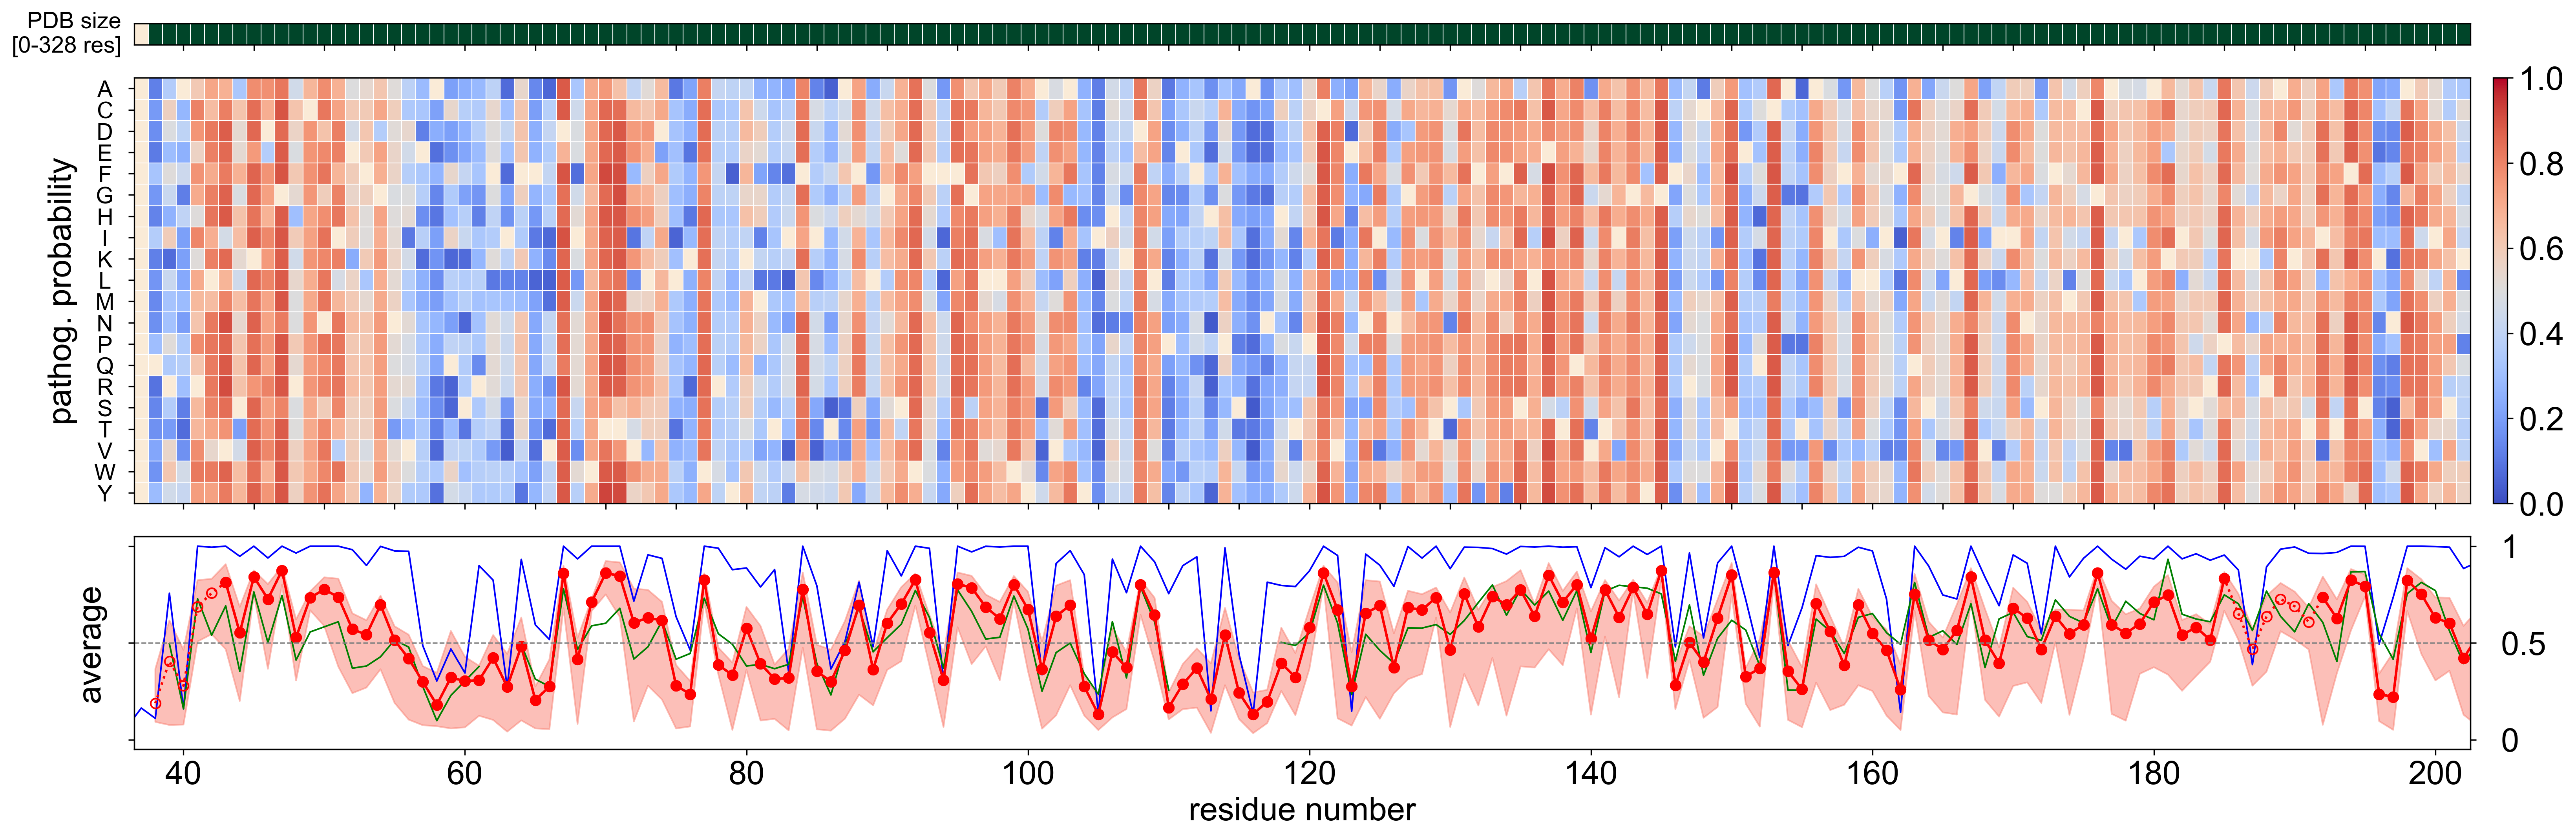

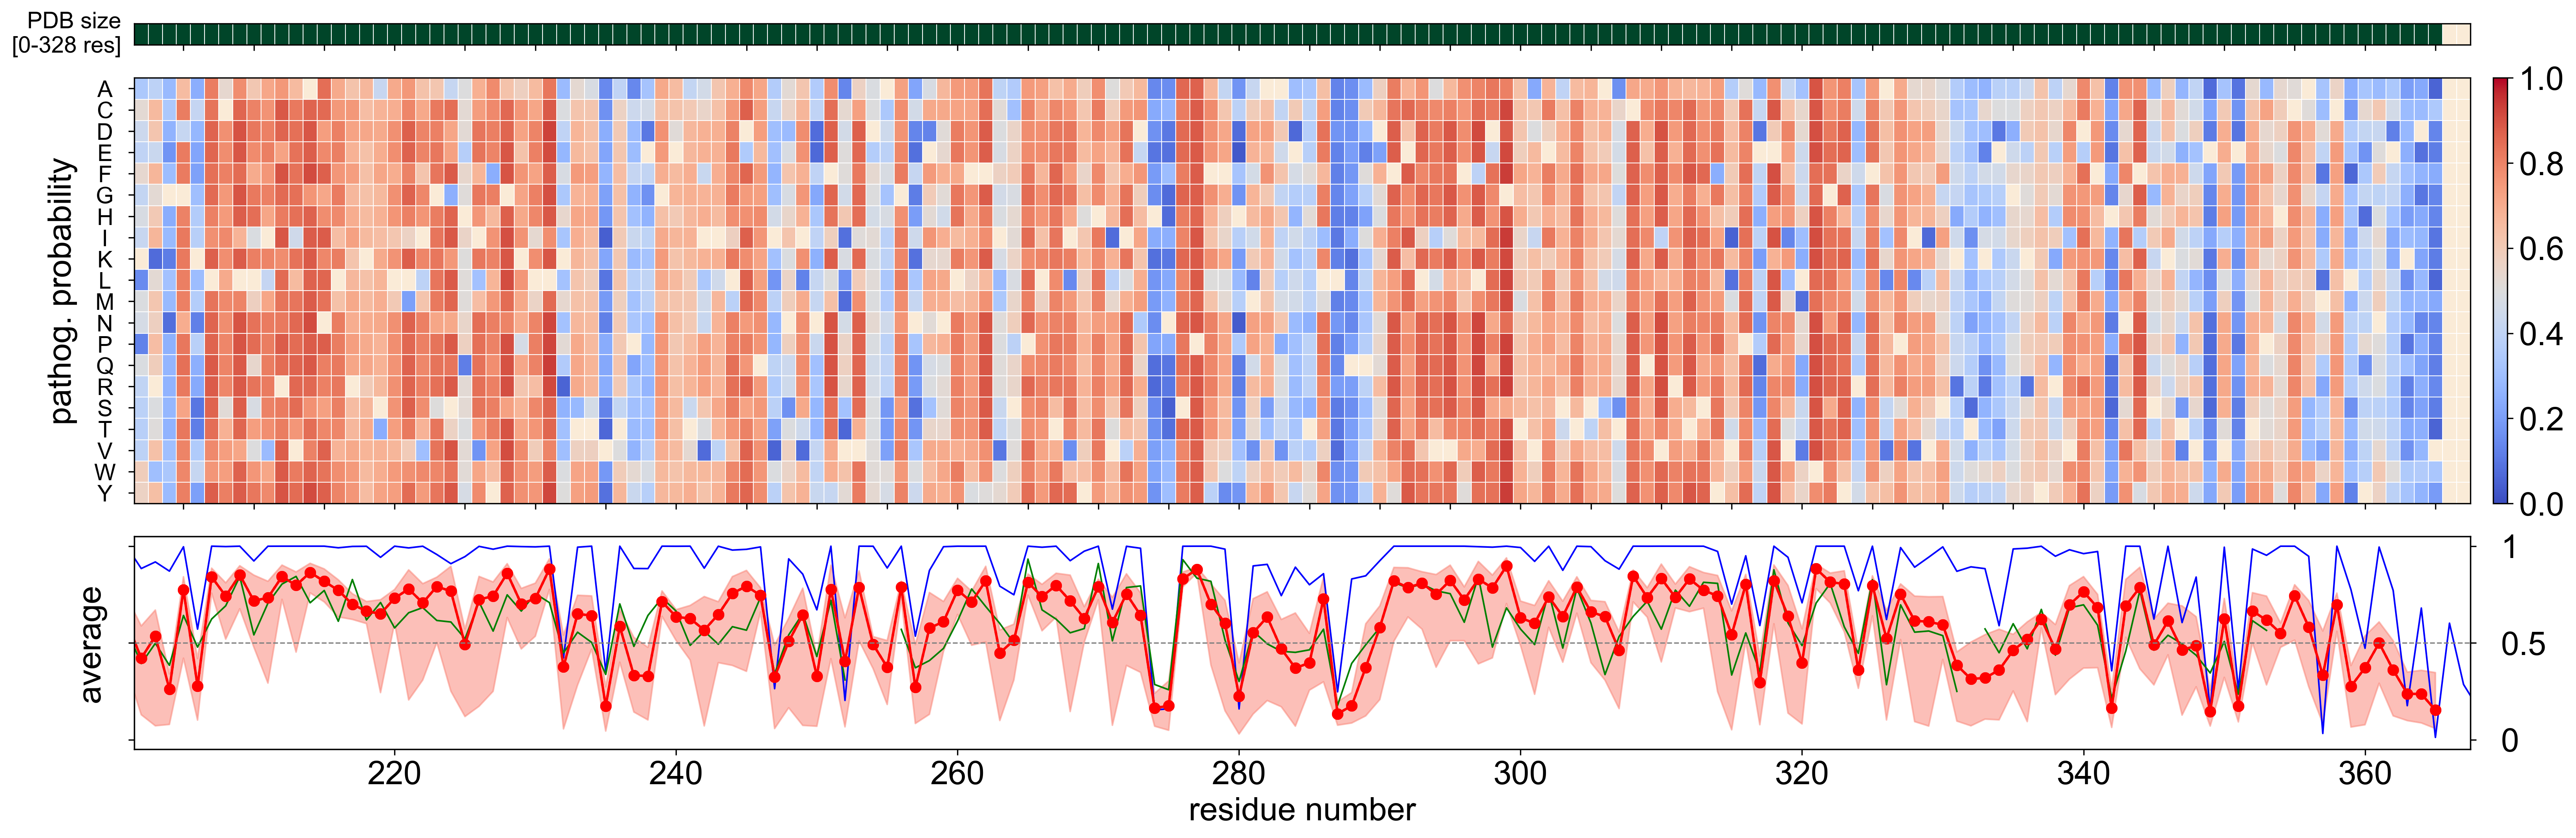

In [7]:
from IPython.core.display import Image, display
display(Image('local/sat_mutagen-1.png', width=900, unconfined=True))
display(Image('local/sat_mutagen-2.png', width=900, unconfined=True))

Rhapsody's output also contains predictions from other two methods, PolyPhen-2 and EVmutation.

In the table below, we show that Rhapsody and EVmutation have more balanced predictions than PolyPhen-2. The latter, in fact, predicts ~77% of all possible ROMK variants to be "deleterious". On the other hand, Rhapsody and EVmutation are unable to provide predictions for, respectively, ~16% and ~23% of variants.

In [8]:
from collections import Counter

table = []
for method in ['classic-sliced', 'EVmutation-sliced', 
               'PolyPhen-2', 'EVmutation']:
    if 'sliced' in method:
        preds = all_preds[method].getPredictions()
        count = Counter(preds['path. class'])
    else:
        preds = all_preds['classic-sliced'].getPredictions()
        count = Counter(preds[f'{method} path. class'])
    # calculate fraction of predictions in each class
    dels = count.get('deleterious', 0) + count.get('prob.delet.', 0)
    neus = count.get('neutral', 0) + count.get('prob.neutral', 0)
    unks = count.get('?', 0)
    n = len(preds)
    if method == 'classic-sliced':
        method = 'Rhapsody'
    elif method == 'EVmutation-sliced':
        method = 'Rhapsody+EVmutation'
    table.append([method, dels/n, neus/n, unks/n])
df_stats = pd.DataFrame(table, columns=['method', '% del.', '% neu.', '% unk.'])
pd.set_option('max_colwidth', 20)
df_stats

method    % del.    % neu.    % unk.
0             Rhapsody  0.555122  0.283753  0.161125
1  Rhapsody+EVmutation  0.492395  0.254408  0.253197
2           PolyPhen-2  0.765379  0.234621  0.000000
3           EVmutation  0.489568  0.282811  0.227621

## Comparison with experimental results

In [9]:
# import exp. results from file
reader = csv.reader(open('data/experimental_results.csv'))
# translation map for phenotype codes 
exp_map = {'-1': 'GOF', '0': 'NEU', '1': 'INT', '2': 'DEL'}

# rename classifier variants and prediction outputs
cases = list(all_preds.keys())
case_map = {
    'classic-chain': 'R_ch', 'classic-reduced': 'R_rd', 
    'classic-sliced': 'R_sl', 'EVmutation-chain': 'R+E_ch',
    'EVmutation-reduced': 'R+E_rd', 'EVmutation-sliced': 'R+E_sl'}

# fill table with exp. results and relative predictions for
# tested variants
table = []
for i,l in enumerate(reader):
    # skip header
    if i==0:
        continue
        
    # store SAV coordinates, exp. info and group info
    SAV = l[0]
    oSAV = 'P48048 '+l[1] if l[1] else 'P48048 '+SAV
    exp_fitness = exp_map[l[2]]
    group = l[3]
    pred_class = l[4]
    hSAV = f'({l[1][-3:]:3})' if l[1] else ' -'
    row = [SAV, oSAV, hSAV, exp_fitness, group, pred_class]
    
    # store predictions (scores and classes)
    for case in cases:
        rh = all_preds[case].getPredictions(SAV=oSAV)
        row.append(rh['path. prob.'])
        row.append(rh['path. class'])
    
    # store predictions from EVmutation and PolyPhen-2
    rh = rh_ref_classic.getPredictions(SAV=oSAV)
    for method in ['EVmutation', 'PolyPhen-2']:
        row.append(rh[f'{method} score'])
        row.append(rh[f'{method} path. class'])

    table.append(row)

# store table in a dataframe
columns = ['SAV', 'oSAV', 'hSAV', 'exp. fitness', 'group', 'pred.class']
for c in cases:
    columns.extend([f'{case_map[c]} score', case_map[c]])
for c in ['EVmut', 'PP2']:
    columns.extend([f'{c} score', c])
df = pd.DataFrame(table, columns=columns)

# print subset of columns
sel_cols = [c for c in columns if not (c=='oSAV' or c.endswith('score'))]
pd.set_option('max_colwidth', 15)
display(df[sel_cols])

SAV   hSAV exp. fitness group     pred.class         R_ch  \
0   140 V M      -          GOF     0    pos_control      neutral   
1    80 K M      -          GOF     0    pos_control      neutral   
2   342 H S      -          INT     1            GOF      neutral   
3    65 F L      -          NEU     1            GOF      neutral   
4    86 T A      -          NEU     1            GOF      neutral   
5   154 A P      -          DEL     1            GOF      neutral   
6    94 F L      -          NEU     1            GOF      neutral   
7   358 C Q      -          DEL     2      del_novel  deleterious   
8   355 C Q      -          DEL     2      del_novel  deleterious   
9   361 N C      -          INT     2      del_novel  deleterious   
10  253 V D      -          INT     2      del_novel  deleterious   
11  361 N W      -          NEU     2      del_novel  deleterious   
12   85 I V      -          NEU     3  neu_consensus      neutral   
13  101 V A  (A V)          NEU     3  neu_consensus      neutral   
14  247 T V  (I V)          NEU     3  neu_consensus      neutral   
15   82 T L      -          NEU     3  neu_consensus      neutral   
16  105 V I  (I V)          NEU     3  neu_consensus      neutral   
17  116 D A  (A D)          NEU     4      neu_novel      neutral   
18  116 D S  (A S)          NEU     4      neu_novel      neutral   
19  332 T S      -          NEU     4      neu_novel      neutral   
20   38 Q R      -          NEU     4      neu_novel      neutral   
21  359 L F      -          NEU     4      neu_novel      neutral   
22  113 Y H  (H Y)          GOF     4      neu_novel      neutral   
23  224 S C      -          NEU     5     discordant  deleterious   
24  323 Y H      -          NEU     5     discordant  deleterious   
25  196 K G      -          INT     5     discordant      neutral   
26  193 T M      -          NEU     5     discordant  deleterious   
27   46 E N  (D N)          NEU     5     discordant  deleterious   
28  265 P R      -          DEL     6  del_consensus  deleterious   
29  265 P Y      -          INT     6  del_consensus  deleterious   
30  121 C H      -          INT     6  del_consensus  deleterious   
31  291 F Q      -          DEL     6  del_consensus  deleterious   
32  318 E I      -          DEL     6  del_consensus  deleterious   

           R_rd         R_sl        R+E_ch        R+E_rd        R+E_sl  \
0   deleterious  deleterious       neutral       neutral       neutral   
1   deleterious  deleterious       neutral       neutral       neutral   
2       neutral      neutral       neutral       neutral       neutral   
3       neutral      neutral       neutral       neutral       neutral   
4       neutral      neutral       neutral       neutral       neutral   
5       neutral      neutral       neutral       neutral       neutral   
6       neutral      neutral       neutral       neutral       neutral   
7   deleterious  deleterious             ?             ?             ?   
8   deleterious  deleterious             ?             ?             ?   
9   deleterious  deleterious             ?             ?             ?   
10  deleterious  deleterious             ?             ?             ?   
11  deleterious  deleterious             ?             ?             ?   
12      neutral      neutral       neutral       neutral       neutral   
13      neutral      neutral       neutral       neutral       neutral   
14      neutral      neutral       neutral       neutral       neutral   
15      neutral      neutral       neutral       neutral       neutral   
16      neutral      neutral       neutral       neutral       neutral   
17      neutral      neutral             ?             ?             ?   
18      neutral      neutral             ?             ?             ?   
19      neutral      neutral             ?             ?             ?   
20      neutral      neutral             ?             ?             ?   
21      neutral      neutral     

## AUROC and other accuracy metrics

In [10]:
class_map = {'neutral': 0, 'prob.neutral': 0, '?': -1,
             'deleterious': 1, 'prob.delet.': 1}
resampling=100

metrics = {}

for GOF_label in [-1, 0, 1]:
    
    metrics[GOF_label] = {}
    
    # define how to assign binary classification labels,
    # in particular for GOF variants
    label_map = {'DEL': 1, 'INT': 1, 'NEU': 0, 'GOF': GOF_label}
    true_labels = np.array([label_map[x] for x in df['exp. fitness']])

    # compute accuracy metrics
    for method in ['R_sl', 'R+E_sl', 'PP2', 'EVmut']:
        pscore = df[f'{method} score']
        if method == 'EVmut':
            pscore = -pscore
        pclass = np.array([class_map[c] for c in df[method]])
        # select valid predictions and true labels
        sel = np.logical_and(~np.isnan(pscore), true_labels!=-1)
        # compute accuracy metrics
        ds = rd.calcScoreMetrics(true_labels[sel], pscore[sel])
        dc = rd.calcClassMetrics(true_labels[sel], pclass[sel])
        # bootstrapped measures
        dsb = rd.calcScoreMetrics(true_labels[sel], pscore[sel], bootstrap=resampling)
        dcb = rd.calcClassMetrics(true_labels[sel], pclass[sel], bootstrap=resampling)
        metrics[GOF_label][method] = {**ds , **dc, **dsb, **dcb}
    
    # for the sake of comparison, we also consider Rhapsody and PolyPhen-2's
    # predictions on the same subset of variants as EVmutation's
    for method in ['R_sl', 'PP2']:
        pscore = df[f'{method} score']
        pclass = np.array([class_map[c] for c in df[method]])
        # ignore SAVs with no EVmutation predictions
        sel = np.logical_and(~np.isnan(df[f'EVmut score']), true_labels!=-1)
        # compute accuracy metrics
        ds = rd.calcScoreMetrics(true_labels[sel], pscore[sel])
        dc = rd.calcClassMetrics(true_labels[sel], pclass[sel])
        # bootstrapped measures
        dsb = rd.calcScoreMetrics(true_labels[sel], pscore[sel], bootstrap=resampling)
        dcb = rd.calcClassMetrics(true_labels[sel], pclass[sel], bootstrap=resampling)
        metrics[GOF_label][f'{method}*'] = {**ds , **dc, **dsb, **dcb}

In [11]:
columns = ['method', 'GOF class', 'AUROC', 'AUPRC', 'MCC',
           'precision', 'recall', 'F1 score',
           'precision (0)', 'recall (0)', 'F1 score (0)', 
           'precision (1)', 'recall (1)', 'F1 score (1)']
table = []
for method in ['R_sl', 'PP2', 'EVmut', 'R+E_sl', 'R_sl*', 'PP2*']:
    for GOF_label in [-1, 0, 1]:
        row = [method, GOF_label]
        d = metrics[GOF_label][method]
        for col in columns[2:]:
            s = '{:.2f} ({:.2f}+/-{:.2f})'.format(
                d[col], d[f'mean {col}'], d[f'{col} std']
            )
            row.append(s)
        table.append(row)
df_stats = pd.DataFrame(table, columns=columns)
pd.set_option('max_colwidth', 20)
df_stats

method  GOF class               AUROC               AUPRC  \
0     R_sl         -1  0.87 (0.86+/-0.07)  0.85 (0.85+/-0.09)   
1     R_sl          0  0.86 (0.86+/-0.06)  0.83 (0.83+/-0.07)   
2     R_sl          1  0.81 (0.81+/-0.08)  0.82 (0.81+/-0.08)   
3      PP2         -1  0.81 (0.81+/-0.08)  0.70 (0.71+/-0.13)   
4      PP2          0  0.81 (0.81+/-0.07)  0.68 (0.69+/-0.12)   
5      PP2          1  0.77 (0.76+/-0.10)  0.69 (0.70+/-0.12)   
6    EVmut         -1  0.77 (0.75+/-0.17)  0.85 (0.83+/-0.13)   
7    EVmut          0  0.77 (0.77+/-0.15)  0.84 (0.84+/-0.12)   
8    EVmut          1  0.79 (0.79+/-0.13)  0.87 (0.86+/-0.09)   
9   R+E_sl         -1  0.81 (0.81+/-0.16)  0.85 (0.85+/-0.14)   
10  R+E_sl          0  0.80 (0.80+/-0.14)  0.83 (0.83+/-0.12)   
11  R+E_sl          1  0.78 (0.78+/-0.12)  0.82 (0.82+/-0.10)   
12   R_sl*         -1  0.84 (0.84+/-0.10)  0.82 (0.82+/-0.12)   
13   R_sl*          0  0.81 (0.81+/-0.10)  0.79 (0.79+/-0.12)   
14   R_sl*          1  0.82 (0.82+/-0.08)  0.82 (0.83+/-0.09)   
15    PP2*         -1  0.74 (0.74+/-0.11)  0.64 (0.66+/-0.15)   
16    PP2*          0  0.73 (0.71+/-0.12)  0.61 (0.61+/-0.15)   
17    PP2*          1  0.75 (0.75+/-0.12)  0.67 (0.68+/-0.16)   

                   MCC           precision              recall  \
0   0.46 (0.45+/-0.17)  0.74 (0.75+/-0.08)  0.73 (0.72+/-0.08)   
1   0.40 (0.42+/-0.14)  0.73 (0.75+/-0.07)  0.70 (0.71+/-0.08)   
2   0.45 (0.45+/-0.16)  0.73 (0.74+/-0.08)  0.73 (0.72+/-0.08)   
3   0.46 (0.45+/-0.17)  0.74 (0.75+/-0.09)  0.73 (0.73+/-0.09)   
4   0.40 (0.42+/-0.13)  0.73 (0.75+/-0.07)  0.70 (0.71+/-0.07)   
5   0.45 (0.46+/-0.14)  0.73 (0.74+/-0.07)  0.73 (0.73+/-0.07)   
6   0.80 (0.80+/-0.12)  0.91 (0.92+/-0.04)  0.90 (0.91+/-0.06)   
7   0.81 (0.80+/-0.11)  0.92 (0.92+/-0.04)  0.91 (0.90+/-0.06)   
8   0.67 (0.68+/-0.13)  0.86 (0.88+/-0.04)  0.82 (0.83+/-0.08)   
9   0.47 (0.48+/-0.21)  0.75 (0.77+/-0.10)  0.75 (0.75+/-0.10)   
10  0.50 (0.50+/-0.18)  0.77 (0.79+/-0.09)  0.77 (0.77+/-0.09)   
11  0.36 (0.38+/-0.18)  0.69 (0.72+/-0.10)  0.68 (0.70+/-0.09)   
12  0.29 (0.29+/-0.23)  0.66 (0.69+/-0.12)  0.65 (0.65+/-0.11)   
13  0.19 (0.19+/-0.21)  0.63 (0.66+/-0.11)  0.59 (0.60+/-0.11)   
14  0.37 (0.36+/-0.19)  0.69 (0.71+/-0.10)  0.68 (0.68+/-0.09)   
15  0.29 (0.29+/-0.24)  0.66 (0.68+/-0.12)  0.65 (0.65+/-0.11)   
16  0.19 (0.21+/-0.17)  0.63 (0.65+/-0.09)  0.59 (0.60+/-0.08)   
17  0.37 (0.33+/-0.21)  0.69 (0.69+/-0.10)  0.68 (0.67+/-0.10)   

              F1 score       precision (0)          recall (0)  \
0   0.74 (0.73+/-0.08)  0.81 (0.81+/-0.11)  0.72 (0.70+/-0.11)   
1   0.70 (0.71+/-0.07)  0.82 (0.84+/-0.08)  0.67 (0.68+/-0.10)   
2   0.73 (0.73+/-0.08)  0.76 (0.76+/-0.10)  0.72 (0.73+/-0.10)   
3   0.74 (0.73+/-0.08)  0.81 (0.81+/-0.10)  0.72 (0.72+/-0.10)   
4   0.70 (0.71+/-0.07)  0.82 (0.83+/-0.09)  0.67 (0.67+/-0.10)   
5   0.73 (0.73+/-0.07)  0.76 (0.76+/-0.09)  0.72 (0.73+/-0.11)   
6   0.90 (0.90+/-0.07)  0.86 (0.86+/-0.09)  1.00 (1.00+/-0.00)   
7   0.91 (0.90+/-0.06)  0.88 (0.87+/-0.07)  1.00 (1.00+/-0.00)   
8   0.81 (0.82+/-0.09)  0.75 (0.76+/-0.11)  1.00 (1.00+/-0.00)   
9   0.75 (0.75+/-0.11)  0.77 (0.77+/-0.13)  0.83 (0.84+/-0.11)   
10  0.77 (0.77+/-0.09)  0.80 (0.80+/-0.10)  0.86 (0.86+/-0.10)   
11  0.67 (0.69+/-0.09)  0.67 (0.68+/-0.11)  0.83 (0.85+/-0.11)   
12  0.65 (0.66+/-0.11)  0.73 (0.75+/-0.14)  0.67 (0.66+/-0.13)   
13  0.60 (0.61+/-0.11)  0.73 (0.75+/-0.13)  0.57 (0.58+/-0.13)   
14  0.68 (0.68+/-0.09)  0.73 (0.73+/-0.13)  0.67 (0.66+/-0.14)   
15  0.65 (0.65+/-0.12)  0.73 (0.72+/-0.15)  0.67 (0.67+/-0.14)   
16  0.60 (0.61+/-0.08)  0.73 (0.72+/-0.11)  0.57 (0.58+/-0.11)   
17  0.68 (0.67+/-0.10)  0.73 (0.73+/-0.13)  0.67 (0.66+/-0.13)   

          F1 score (0)       precision (1)          recall (1)  \
0   0.76 (0.75+/-0.09)  0.64 (0.63+/-0.13)  0.75 (0.76+/-0.13)   
1   0.74 (0.74+/-0.08)  0.56 (0.56+/-0.11)  0.75 (0.76+/-0.12)   
2   0.74 (0.74+/-0.08)  0.69 (0.69+/-0.13)  0.73 (0.72+/-0.1

## Figures

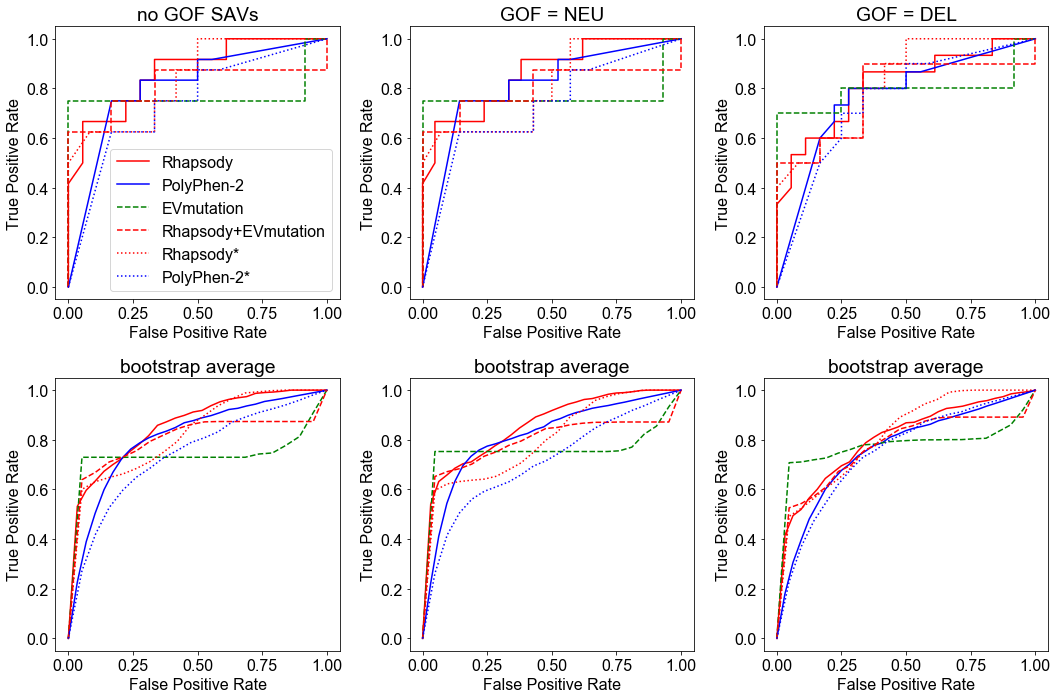

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})

legend = {
    'R_sl':   ('Rhapsody', '-', 'red'),
    'R+E_sl': ('Rhapsody+EVmutation', '--', 'red'),
    'PP2':    ('PolyPhen-2', '-', 'blue'),
    'EVmut':  ('EVmutation', '--', 'green'),
    'R_sl*':  ('Rhapsody*', ':', 'red'),
    'PP2*':   ('PolyPhen-2*', ':', 'blue')
}

fig, axes = plt.subplots(2, 3, figsize=(15,10))

for GOF_label in [-1, 0, 1]:
    ax0 = axes[0, GOF_label + 1]
    ax1 = axes[1, GOF_label + 1]
    
    if GOF_label == -1:
        ax0.set_title('no GOF SAVs')
    elif GOF_label == 0:
        ax0.set_title('GOF = NEU')
    else:
        ax0.set_title('GOF = DEL')
    ax1.set_title('bootstrap average')
    
    for method in ['R_sl', 'PP2', 'EVmut', 'R+E_sl', 'R_sl*', 'PP2*']:
        l = legend[method]
        metr = metrics[GOF_label][method]
        ax0.plot(metr['ROC']['FPR'], metr['ROC']['TPR'],
                 ls=l[1], c=l[2], label=l[0])
        ax1.plot(metr['mean ROC']['FPR'], metr['mean ROC']['TPR'],
                 ls=l[1], c=l[2], label=l[0])

for ax in axes.flatten():
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
axes[0, 0].legend()

fig.tight_layout()
fig.savefig('local/ROCs.png', dpi=300)

In [13]:
EVmut_cutoff = -rd.getSettings(print=False)['EVmutation_metrics']['optimal cutoff']

In [14]:
# positive control SAVs
CTRL_SAVs = df[df['group'] == '0']

# SAVs with both Rhapsody and EVmutation predictions
subset = df[~np.isnan(df['EVmut score'])]
subset = subset[subset['group'] != '0']
DEL_SAVs = subset[subset['exp. fitness'] == 'DEL']
INT_SAVs = subset[subset['exp. fitness'] == 'INT']
NEU_SAVs = subset[subset['exp. fitness'] == 'NEU']

# SAVs without EVmutation predictions
subset = df[np.isnan(df['EVmut score'])]
subset = subset[subset['group'] !=0 ]
DEL_SAVs_rh = subset[subset['exp. fitness'] == 'DEL']
INT_SAVs_rh = subset[subset['exp. fitness'] == 'INT']
NEU_SAVs_rh = subset[subset['exp. fitness'] == 'NEU']
GOF_SAVs_rh = subset[subset['exp. fitness'] == 'GOF']

In [15]:
EVmut_score = rh_ref_classic.getPredictions()['EVmutation score']
PP2_score = rh_ref_classic.getPredictions()['PolyPhen-2 score']
rhapsody_pprob = rh_ref_classic.getPredictions()['path. prob.']

from scipy.stats import spearmanr

sel = ~np.isnan(EVmut_score)
rho_EVm = spearmanr(rhapsody_pprob[sel], EVmut_score[sel])

sel = ~np.isnan(rhapsody_pprob)
rho_PP2 = spearmanr(rhapsody_pprob[sel], PP2_score[sel])

print(f'Spearman corr. with EVmutation: {rho_EVm[0]:5.3f}')
print(f'Spearman corr. with PolyPhen-2: {rho_PP2[0]:5.3f}')

Spearman corr. with EVmutation: -0.668
Spearman corr. with PolyPhen-2: 0.782


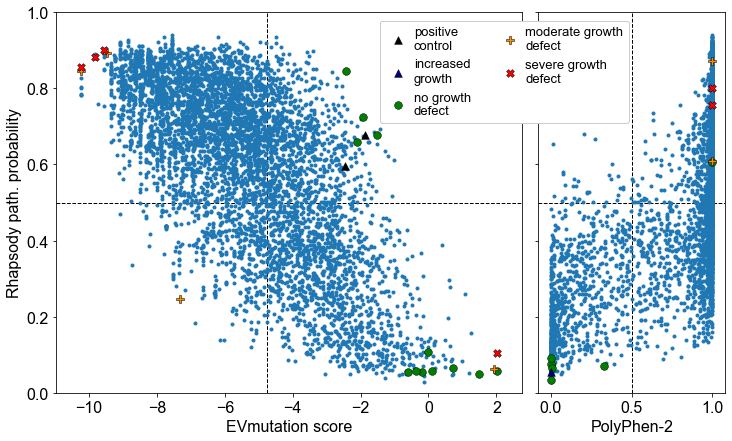

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12,7),
                         gridspec_kw={'width_ratios': [10, 4]})
plt.subplots_adjust(wspace=0.05)

ax1, ax2 = axes
ax1.scatter(EVmut_score, rhapsody_pprob, marker='.')
ax1.axvline(EVmut_cutoff, color='k', linestyle='--', lw=1, zorder=0)
ax1.axhline(0.5, color='k', linestyle='--', lw=1, zorder=0)

ax1.set_ylim((0,1))
ax1.set_xlabel('EVmutation score')
ax1.set_ylabel('Rhapsody path. probability')

ax1.scatter(CTRL_SAVs['EVmut score'], CTRL_SAVs['R_sl score'], s=60, color='k',  marker='^',
            label='positive\ncontrol', linewidths=.5, edgecolors='k')
ax1.scatter(NEU_SAVs['EVmut score'], NEU_SAVs['R_sl score'], s=60, color='green',  marker='o',
            label='no growth\ndefect', linewidths=.5, edgecolors='k')
ax1.scatter(INT_SAVs['EVmut score'], INT_SAVs['R_sl score'], s=80, color='darkorange', marker='P',
            label='moderate growth\ndefect', linewidths=.5, edgecolors='k')
ax1.scatter(DEL_SAVs['EVmut score'], DEL_SAVs['R_sl score'], s=60, color='red',    marker='X',
            label='severe growth\ndefect', linewidths=.5, edgecolors='k')

ax2.set_ylim((0,1))
# ax2.set_xlim((-.1,1.1))
ax2.set_xlabel('PolyPhen-2')
ax2.set_yticklabels([])

ax2.axhline(0.5, color='k', linestyle='--', lw=1, zorder=0)
ax2.axvline(0.5, color='k', linestyle='--', lw=1, zorder=0)
ax2.scatter(PP2_score, rhapsody_pprob, marker='.')
ax2.scatter(NEU_SAVs_rh['PP2 score'], NEU_SAVs_rh['R_sl score'], s=60,
            color='green', marker='o', label='NEU',
            linewidths=.5, edgecolors='k')
ax2.scatter(GOF_SAVs_rh['PP2 score'], GOF_SAVs_rh['R_sl score'], s=60,
            color='navy', marker='^', label='increased\ngrowth',
            linewidths=.5, edgecolors='k')
ax2.scatter(INT_SAVs_rh['PP2 score'], INT_SAVs_rh['R_sl score'], s=80,
            color='darkorange', marker='P', label='INT',
            linewidths=.5, edgecolors='k')
ax2.scatter(DEL_SAVs_rh['PP2 score'], DEL_SAVs_rh['R_sl score'], s=60,
            color='red', marker='X', label='DEL',
            linewidths=.5, edgecolors='k')

handles = ax1.get_legend_handles_labels()[0]
labels = ax1.get_legend_handles_labels()[1]
handles.insert(1, ax2.get_legend_handles_labels()[0][1])
labels.insert(1, ax2.get_legend_handles_labels()[1][1])
ax1.set_zorder(1)
ax1.legend(handles, labels, fontsize=13, handletextpad=0.2,
           ncol=2, loc=(0.695, 0.71), framealpha=1.0)

plt.savefig('local/scatter_plot-classic.png', dpi=300)

In [17]:
EVmut_score = rh_ref_EVmut.getPredictions()['EVmutation score']
rhapsody_pprob = rh_ref_EVmut.getPredictions()['path. prob.']

from scipy.stats import spearmanr

sel = ~np.isnan(rhapsody_pprob)
rho = spearmanr(rhapsody_pprob[sel], EVmut_score[sel])

print(f'Spearman corr. Rhapsody+EVmut. vs EVmutation: {rho[0]:5.3f}')

Spearman corr. Rhapsody+EVmut. vs EVmutation: -0.864


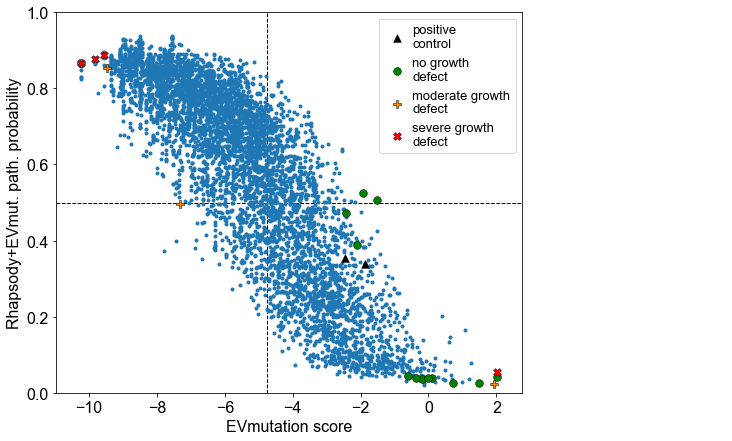

In [18]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})

fig, axes = plt.subplots(1, 2, figsize=(12,7),
                         gridspec_kw={'width_ratios': [10, 4]})
plt.subplots_adjust(wspace=0.05)

ax1, ax2 = axes
ax1.scatter(EVmut_score, rhapsody_pprob, marker='.')
ax1.axvline(EVmut_cutoff, color='k', linestyle='--', lw=1, zorder=0)
ax1.axhline(0.5, color='k', linestyle='--', lw=1, zorder=0)

ax1.set_ylim((0,1))
ax1.set_xlabel('EVmutation score')
ax1.set_ylabel('Rhapsody+EVmut. path. probability')

ax1.scatter(CTRL_SAVs['EVmut score'], CTRL_SAVs['R+E_sl score'], s=60, color='k', marker='^',
            label='positive\ncontrol', linewidths=.5, edgecolors='k')
ax1.scatter(NEU_SAVs['EVmut score'], NEU_SAVs['R+E_sl score'], s=60, color='green', marker='o',
            label='no growth\ndefect', linewidths=.5, edgecolors='k')
ax1.scatter(INT_SAVs['EVmut score'], INT_SAVs['R+E_sl score'], s=80, color='darkorange', marker='P',
            label='moderate growth\ndefect', linewidths=.5, edgecolors='k')
ax1.scatter(DEL_SAVs['EVmut score'], DEL_SAVs['R+E_sl score'], s=60, color='red', marker='X',
            label='severe growth\ndefect', linewidths=.5, edgecolors='k')

ax1.legend(fontsize=13, handletextpad=0.2)

ax2.axis('off')

plt.savefig('local/scatter_plot-EVmut.png', dpi=300)

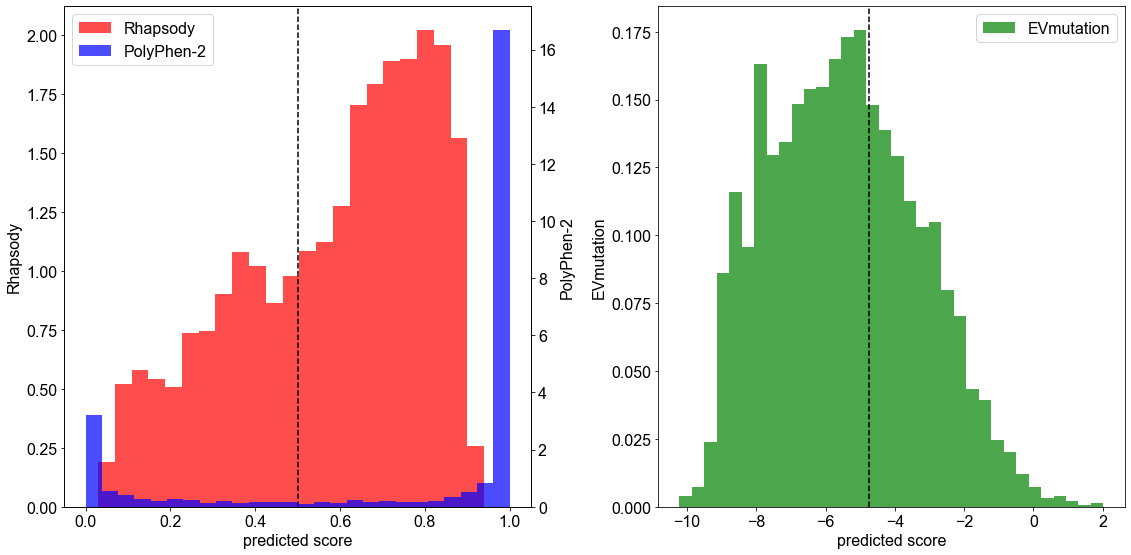

In [19]:
EVmut_score = rh_ref_classic.getPredictions()['EVmutation score']
EVmut_score = EVmut_score[~np.isnan(EVmut_score)]
rhapsody_pprob = rh_ref_classic.getPredictions()['path. prob.']
rhapsody_pprob = rhapsody_pprob[~np.isnan(rhapsody_pprob)]
PP2_score = rh_ref_classic.getPredictions()['PolyPhen-2 score']

fig, axes = plt.subplots(1, 2, figsize=(16,8))

ax = axes[0]
ax2 = ax.twinx()
ax.hist(rhapsody_pprob, density=True, bins='auto',
        color='red', alpha=.7, label='Rhapsody')
ax2.hist(PP2_score, density=True, bins='auto',
         color='blue', alpha=.7, label='PolyPhen-2')
ax.axvline(x=.5, ls='--', color='k')
ax.set_xlabel('predicted score')
ax.set_ylabel('Rhapsody')
ax2.set_ylabel('PolyPhen-2')

handles = ax.get_legend_handles_labels()[0]
labels = ax.get_legend_handles_labels()[1]
handles.extend(ax2.get_legend_handles_labels()[0])
labels.extend(ax2.get_legend_handles_labels()[1])
ax.legend(handles, labels)

axr = axes[1]
axr.hist(EVmut_score, density=True, bins='auto',
         color='green', alpha=.7, label='EVmutation')
axr.set_ylabel('EVmutation')
axr.set_xlabel('predicted score')
axr.axvline(x=EVmut_cutoff, ls='--', color='k')
axr.legend()

fig.tight_layout()
fig.savefig('local/distributions.png', dpi=300)

/home/luca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice


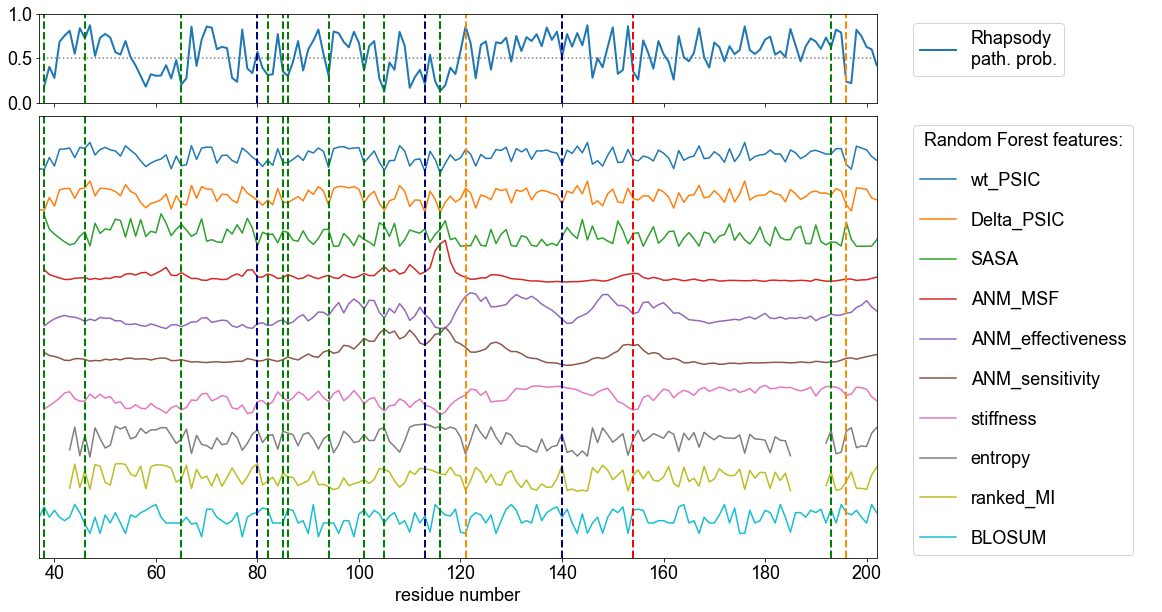

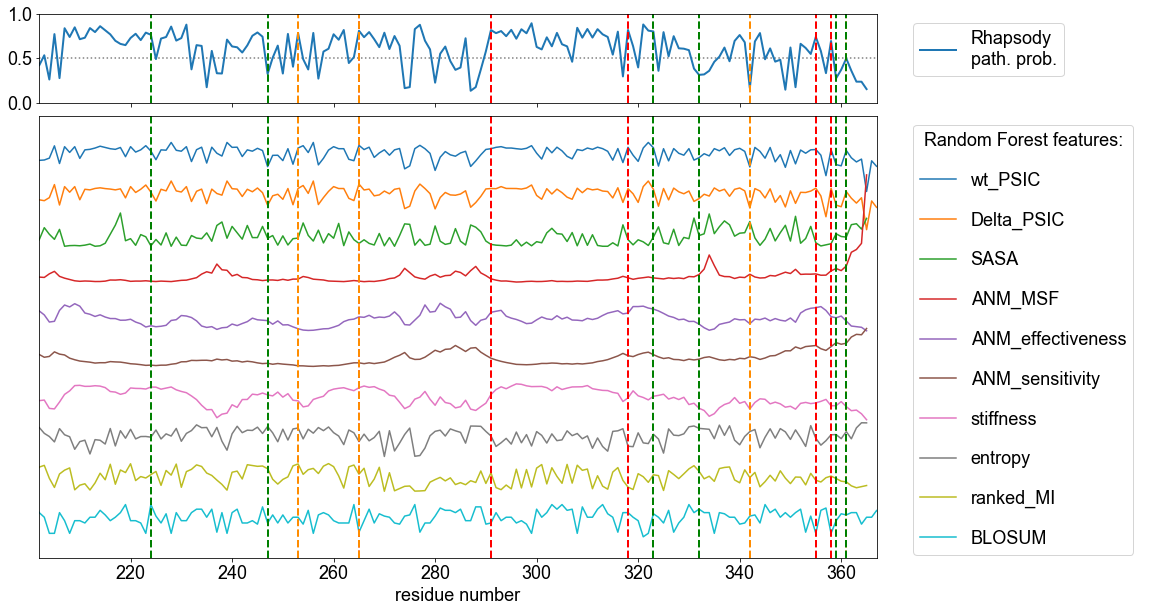

In [20]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18, 'font.family': 'Arial'})

seq_pos = rh_ref_classic.getUniqueSAVcoords()['position']
seq_pos = seq_pos.reshape((-1, 19))
seq_pos = seq_pos[:,0]

resavg_pprob = rh_ref_classic.getResAvgPredictions()['path. prob.']

for rng in [(37,202), (202, 367)]:
    fig, axes = plt.subplots(
        2, 2, figsize=(20,10), 
        gridspec_kw={'width_ratios': [10, 3], 'height_ratios': [2, 10]})
    plt.subplots_adjust(wspace=0.05)
    plt.subplots_adjust(hspace=0.05)

    ax_pp = axes[0,0]
    axes[0,1].axis('off')
    ax = axes[1,0]
    ax_leg = axes[1,1]
    ax_leg.axis('off')

    ax_pp.axhline(y=.5, color='gray', ls=':', zorder=0)
    ax_pp.plot(seq_pos, resavg_pprob, lw=2, label='Rhapsody\npath. prob.')
    ax_pp.set_xlim(rng)
    ax_pp.set_ylim((0, 1))
    ax_pp.set_xticklabels([])
    handles = ax_pp.get_legend_handles_labels()[0]
    labels = ax_pp.get_legend_handles_labels()[1]
    axes[0,1].legend(handles, labels, loc='upper left')

    for i,f in enumerate(rh_ref_classic.featSet):
        f_arr = rh_ref_classic.featMatrix[:,i]
        # residue-average
        f_mtx = f_arr.reshape((-1, 19))
        f_resavg = np.nanmean(f_mtx, axis=1)
        # normalize
        f_resavg -= np.nanmean(f_resavg)
        f_resavg /= 5*np.nanstd(f_resavg)
        # plot
        ax.plot(seq_pos, f_resavg + 9 - i, label=f.replace('-sliced', ''))

    ax.set_ylim((-1, 10))
    ax.set_xlim(rng)
    ax.set_xlabel('residue number')
    ax.set_yticks([])

    handles = ax.get_legend_handles_labels()[0]
    labels = ax.get_legend_handles_labels()[1]
    ax_leg.legend(handles, labels, title="Random Forest features:",
                  loc='upper left', labelspacing=1.2)

    for i, row in df.iterrows():
        pos = int(row['oSAV'].split()[1])
        phenotype = row['exp. fitness']
        if phenotype == 'GOF':
            if row['group'] == 0:
                color = 'black'
            else:
                color = 'navy'
        elif phenotype == 'NEU':
            color = 'green'
        elif phenotype == 'INT':
            color = 'darkorange'
        else:
            assert phenotype == 'DEL'
            color = 'red'
        ax_pp.axvline(x=pos, ls='--', lw=2, color=color)
        ax.axvline(x=pos, ls='--', lw=2, color=color)

    plt.savefig('local/features-{}_{}.png'.format(*rng), dpi=300)